In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### 많이 사용하는 분류분석 모형
- 로지스틱회귀(Logistic Regression)
- SVM(Support Vector Machine)
- 신경망 모형(Artificial Neural Network)
- 의사결정나무(Decision Tree)
- 앙상블(Ensemble)
- 규칙기반(Rule-Based) 분류
- 사례기반(Case-Based) 분류
- 인접이웃(Nearest-Neighbor) 분류
- 베이즈(Bayesian) 분류 모형 등

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import mglearn

from tensorflow import keras
import graphviz
from graphviz import Source

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier 

from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc 

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [44]:
# X=iris['data'], y=iris['target']
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.921


In [45]:
logistic = LogisticRegression(C=1000.0, random_state=42)
logistic.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(logistic.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(logistic.score(X_test, y_test)))

훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.895


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(knn.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.947


In [41]:
# 로지스틱 디시즌트리 케이민즈
logistic = LogisticRegression(C=1000.0, random_state=42)
tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

voting = VotingClassifier(estimators = voting_estimators, voting='soft')

clf_labes = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']
all_clf = [logistic, tree, knn, voting]

In [42]:
voting.fit(X_train, y_train)
pred = voting.predict(X_test)
print('보팅 분류기의 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

보팅 분류기의 정확도 : 0.9211


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
classifiers = [logistic, tree, knn]
for i in classifiers:
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    class_name = i.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.8947
DecisionTreeClassifier 정확도 : 0.8947
KNeighborsClassifier 정확도 : 0.9474


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
pred = tree.predict(X_test)
pred

array([0., 1., 1., 1., 0., 1., 1., 2., 2., 2., 2., 2., 1., 1., 0., 0., 0.,
       1., 0., 1., 2., 1., 2., 1., 2., 1., 0., 2., 0., 2., 2., 2., 0., 0.,
       0., 0., 2., 1.])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9473684210526315

In [30]:
np.mean(pred==y_test)

0.9473684210526315

In [39]:
svc=SVC()
svc.fit(X_train, y_train)

cross_val_score(svc, X_test, y_test, cv=10).mean()

0.8916666666666668

In [40]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

cross_val_score(gnb, X_test, y_test, cv=10).mean()

0.9083333333333332

In [53]:
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, X_train, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.7509881422924901


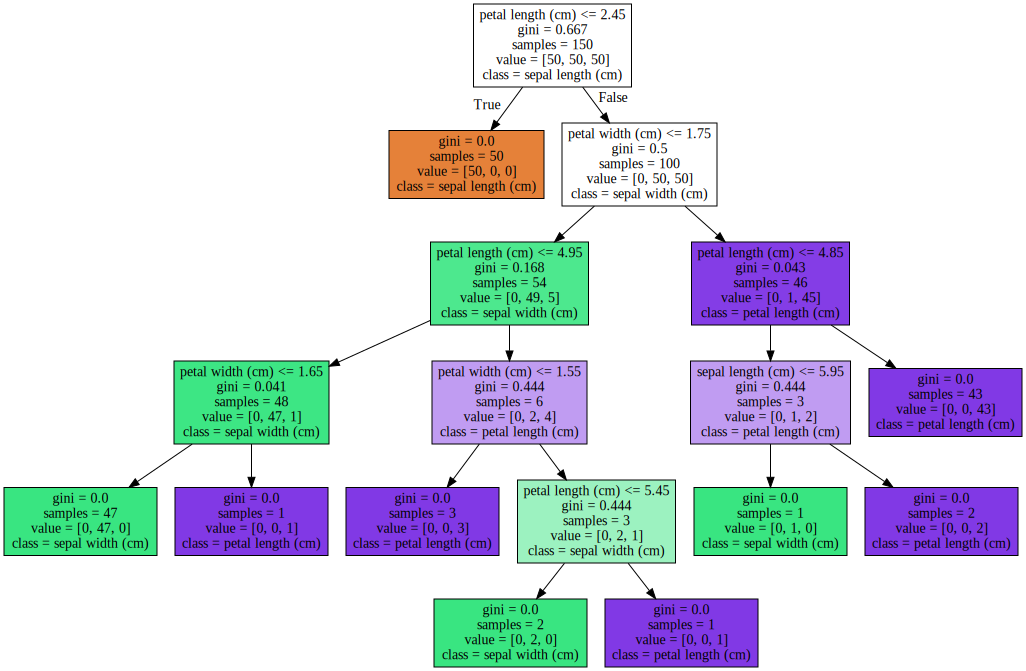

In [9]:
X = iris.data      # 꽃받침의 길이와 너비, 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

export_graphviz(tree_clf,                             # 모델
                out_file="iris_tree2.dot",            # 저장경로 파일설정
                feature_names=iris.feature_names,     # 변수명
                class_names=iris.feature_names,       # 종속변수
                impurity=True,                        # 지니불순도(GINI IMPURITY)
                filled=True) 

Source.from_file("iris_tree2.dot")

In [10]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 결정트리(n_estimators)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

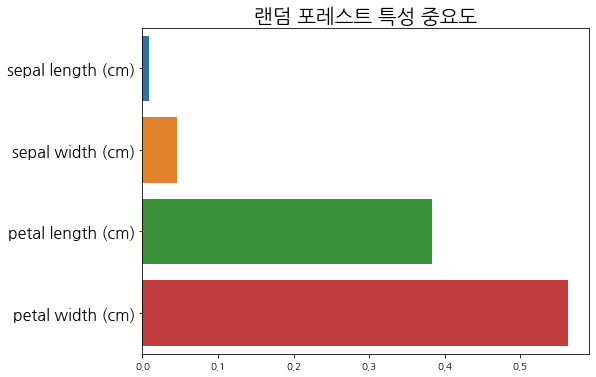

In [27]:
import seaborn as sns
importances_values = forest.feature_importances_
# importances = pd.Series(importances_values, index=cancer.feature_names)
index = iris.feature_names

plt.figure(figsize=(8, 6))
plt.title("랜덤 포레스트 특성 중요도", fontsize=20)
plt.yticks(fontsize=16)
sns.barplot(x=importances_values, y=index)
plt.show()